## Exercise 01 : Line chart with styles

* analyze only the users and not the admins
* analyze only the dates when there were both views and checker commits
* use size of the font should be 8
* the size of the figure is (15,8)
* at the end of your Jupyter Notebook create a markdown cell and insert the question:
“How many times was the number of views larger than 150?” Insert: “The answer
is ___”. Put the number in the text instead of the underline.

In [ ]:
import pandas as pd
import sqlite3
con=sqlite3.connect('data/checking-logs.sqlite')
views_query = """
SELECT
    DATE(datetime) AS date,
    COUNT(*) AS views
FROM
    pageviews
WHERE
    uid LIKE 'user_%'
GROUP BY
    date;
"""
df_views = pd.read_sql(views_query, con, parse_dates=['date'], index_col='date')

commits_query = """
SELECT
    DATE(timestamp) AS date,
    COUNT(*) AS commits
FROM
    checker
WHERE
    uid LIKE 'user_%'
GROUP BY
    date;
"""
df_commits = pd.read_sql(commits_query, con, parse_dates=['date'], index_col='date')


df_final = pd.concat([df_views, df_commits], axis=1).fillna(0)
df_final = df_final[(df_final["views"] > 0) & (df_final["commits"] > 0)]
df_final

,views,commits
date,,
2020-04-17,1.0,23.0
2020-04-18,23.0,69.0
2020-04-19,15.0,33.0
2020-04-21,3.0,25.0
2020-04-22,1.0,28.0
2020-04-23,5.0,43.0
2020-04-25,1.0,104.0
2020-04-26,8.0,261.0
2020-04-28,2.0,5.0


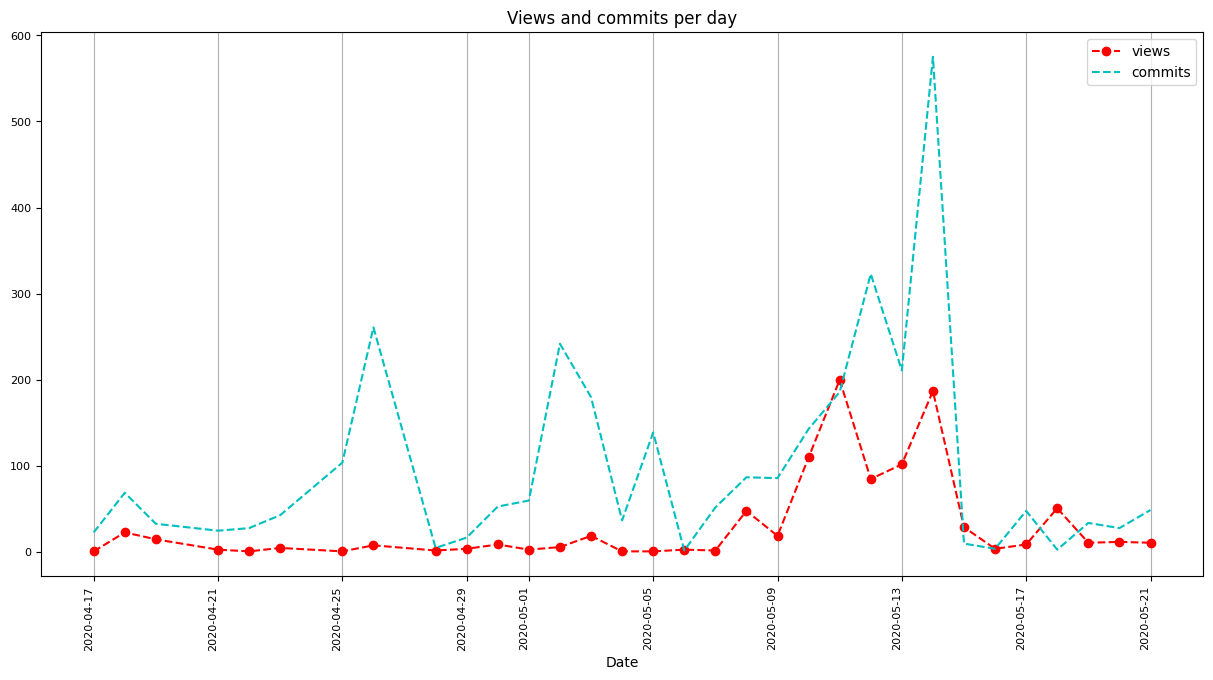

In [95]:
ax=df_final['views'].plot(
    fontsize=8,
    figsize=(15,8),
    title='Views and commits per day',
    style='o--',
    color='red',
    label='views'
)
df_final['commits'].plot(
    ax=ax,
    style='--',
    color='c',
    rot=90,
    label='commits'
)
ax.set_xlabel('Date')
ax.legend()
ax.grid(axis='x')

“How many times was the number of views larger than 150?”

“The answer is 2”

In [ ]:
con.close()